In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6b12281cbb844d649b4f4bfacfa5a9e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LyhGFw7vko4Pjd9_-TDvqhiCAnR7OoGi3QudVVkW_ocQ',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6b12281cbb844d649b4f4bfacfa5a9e7.get_object(Bucket='test-donotdelete-pr-q05gbwae1tzain',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Date,Confirmed,Recovered,Active,Death,District
0,03-02-2020,1,0,1,0,KSD
1,16-02-2020,0,1,0,0,KSD
2,16-03-2020,1,0,1,0,KSD
3,19-03-2020,1,0,2,0,KSD
4,20-03-2020,6,0,8,0,KSD


In [3]:
df = df_data_0

In [4]:
districts = df['District'].unique()
districts

array(['KSD', 'KNR', 'WYD', 'KKD', 'MLPM', 'PKD', 'TSR', 'EKM', 'IDK',
       'KTYM', 'ALP', 'PTA', 'KLM', 'TVM'], dtype=object)

In [5]:
cum_data = df[['Confirmed','Recovered','Death']].cumsum()
cum_data['Active'] = df['Active']
cum_data['District'] = df['District']
cum_data.head()

,Confirmed,Recovered,Death,Active,District
0,1,0,0,1,KSD
1,1,1,0,0,KSD
2,2,1,0,1,KSD
3,3,1,0,2,KSD
4,9,1,0,8,KSD


In [6]:
df['Date'] =  pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [7]:
df.head(20)

,Date,Confirmed,Recovered,Active,Death,District
0,2020-02-03,1,0,1,0,KSD
1,2020-02-16,0,1,0,0,KSD
2,2020-03-16,1,0,1,0,KSD
3,2020-03-19,1,0,2,0,KSD
4,2020-03-20,6,0,8,0,KSD
5,2020-03-21,6,0,14,0,KSD
6,2020-03-22,5,0,19,0,KSD
7,2020-03-23,19,0,38,0,KSD
8,2020-03-24,6,0,44,0,KSD
9,2020-03-26,3,0,47,0,KSD


In [ ]:
# for i in districts:
#     temp = df[df['District'] == i]
#     cum_data = temp[['Confirmed','Recovered','Death']].cumsum()
#     cum_data['Active'] = temp['Active']
#     cum_data.plot(title=i)

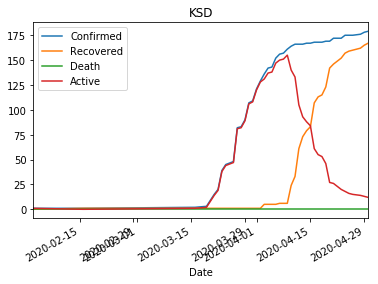

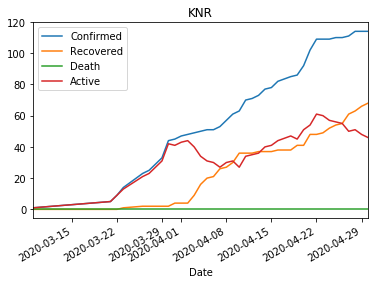

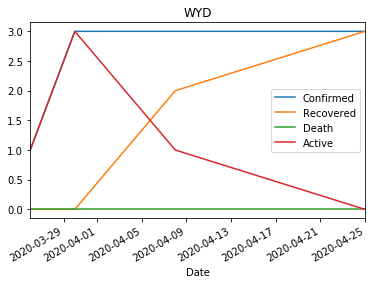

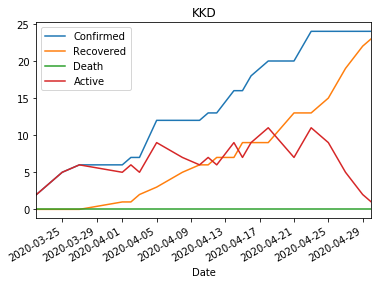

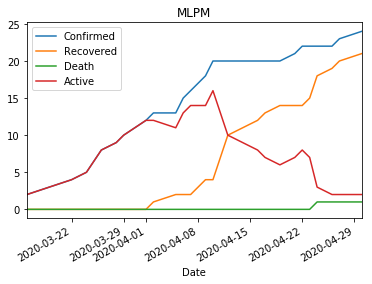

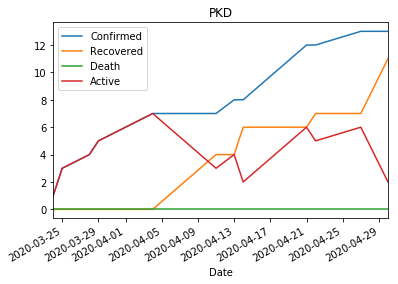

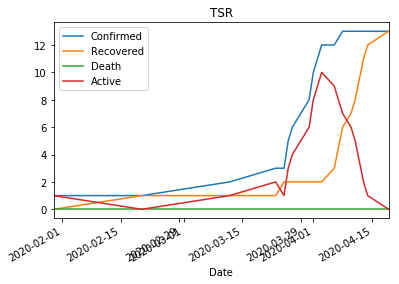

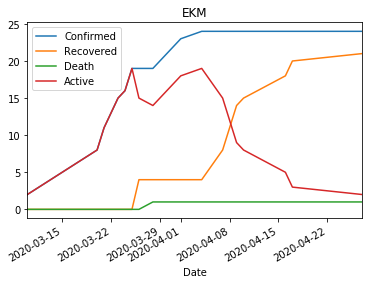

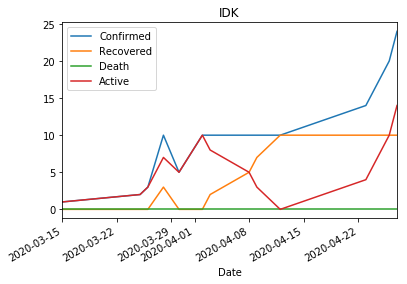

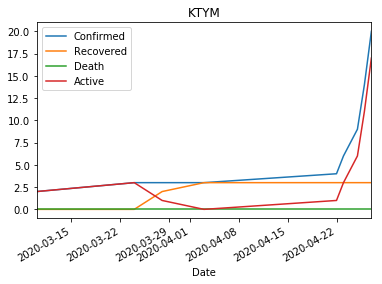

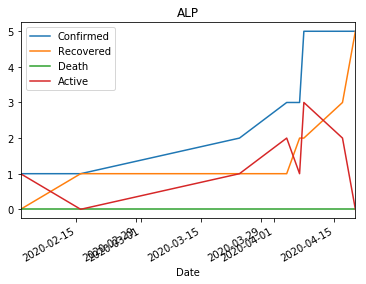

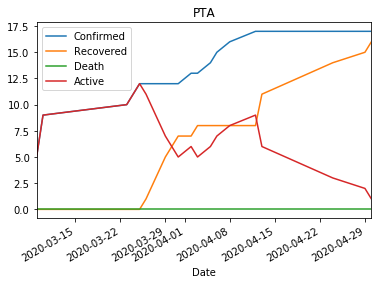

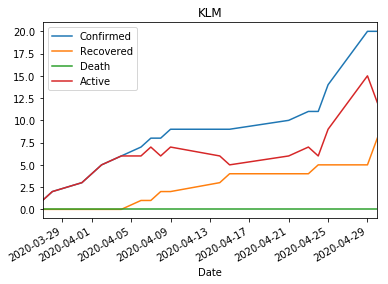

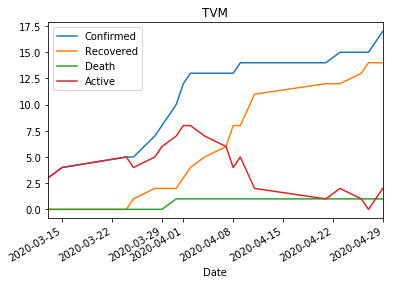

In [17]:
for i in districts:
    temp = df[df['District'] == i]
    cum_data = temp[['Confirmed','Recovered','Death']].cumsum()
    cum_data['Active'] = temp['Active']
    cum_data['Date'] = temp['Date']
    cum_data.set_index('Date',inplace=True)
    cum_data.plot(title=i)